In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Load the dataset
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_clean = df.drop(columns=columns_to_drop)
df_clean.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df_clean.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
df_clean = df_clean.dropna(subset=['Embarked'])
df_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [8]:
# One-hot encode 'Sex'
df_clean['Male'] = (df_clean['Sex'] == 'male').astype(int)
df_clean['Female'] = (df_clean['Sex'] == 'female').astype(int)
df_clean = df_clean.drop(columns=['Sex'])

# One-hot encode 'Embarked'
df_embarked = pd.get_dummies(df_clean['Embarked'], prefix='', prefix_sep='').astype(int)
df_clean = pd.concat([df_clean.drop(columns=['Embarked']), df_embarked], axis=1)

In [9]:
df_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


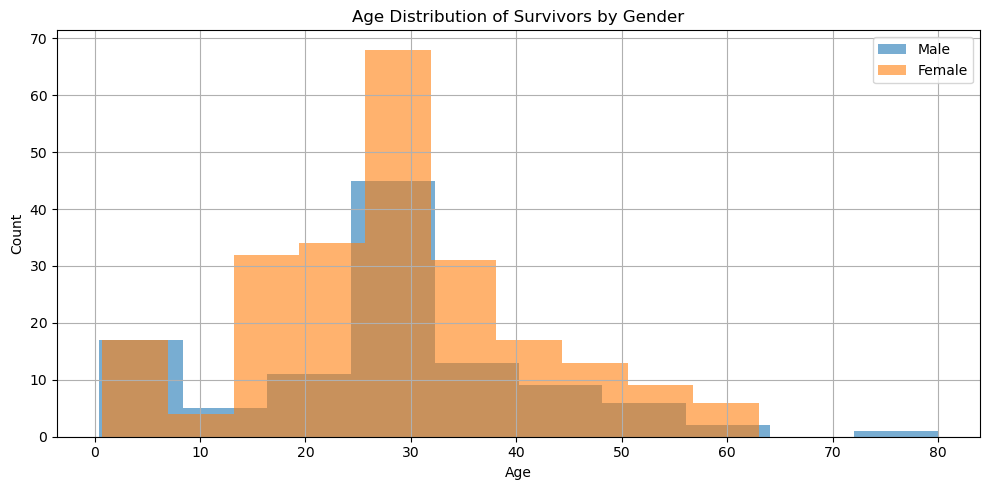

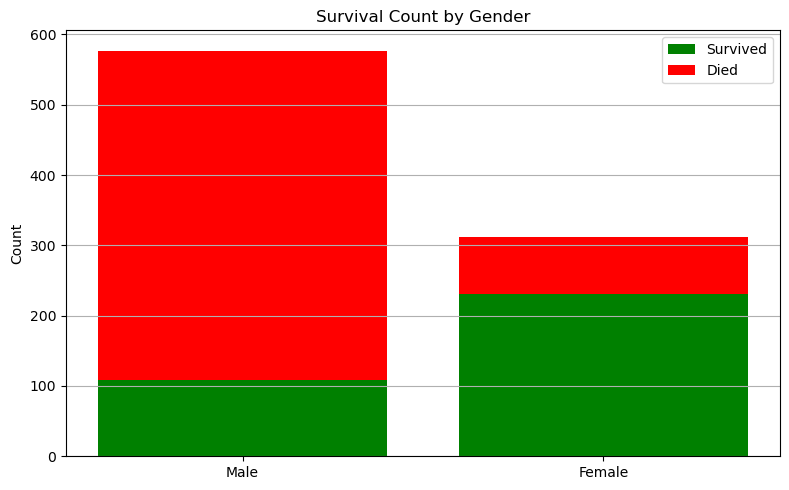

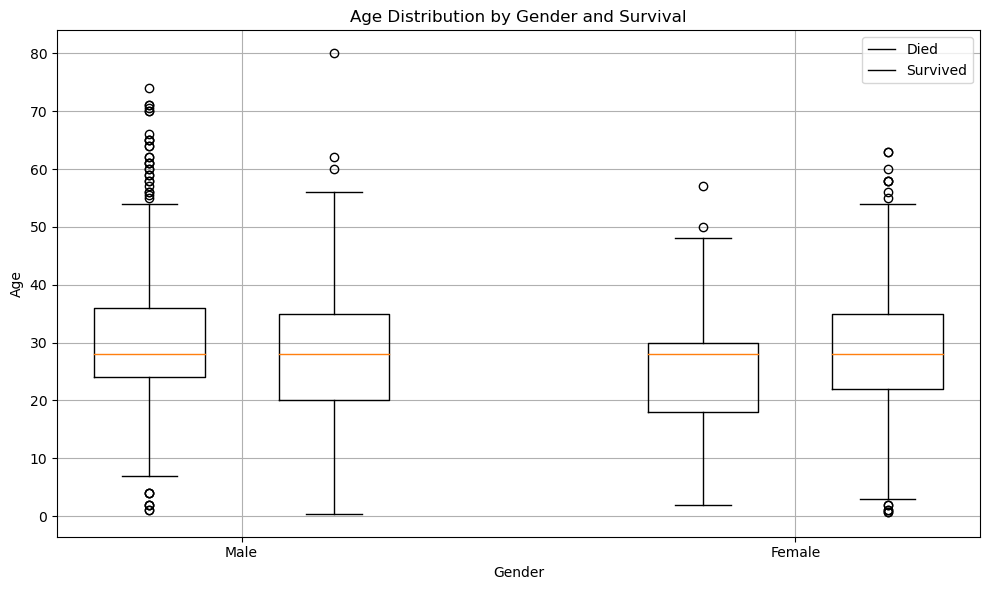

In [10]:

# Create 'Gender' column from Male and Female binary columns
df_clean['Gender'] = df_clean['Male'].map({1: 'Male'})
df_clean.loc[df_clean['Female'] == 1, 'Gender'] = 'Female'

# Separate data for survivors only
survivors = df_clean[df_clean['Survived'] == 1]

# --- Plot 1: Age distribution of survivors by gender ---
plt.figure(figsize=(10, 5))
for gender in ['Male', 'Female']:
    ages = survivors[survivors['Gender'] == gender]['Age']
    plt.hist(ages, bins=10, alpha=0.6, label=gender)
plt.title('Age Distribution of Survivors by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Survival count by gender ---
male_survived = df_clean[(df_clean['Gender'] == 'Male') & (df_clean['Survived'] == 1)].shape[0]
male_died = df_clean[(df_clean['Gender'] == 'Male') & (df_clean['Survived'] == 0)].shape[0]
female_survived = df_clean[(df_clean['Gender'] == 'Female') & (df_clean['Survived'] == 1)].shape[0]
female_died = df_clean[(df_clean['Gender'] == 'Female') & (df_clean['Survived'] == 0)].shape[0]

labels = ['Male', 'Female']
survived_counts = [male_survived, female_survived]
died_counts = [male_died, female_died]

x = range(len(labels))
plt.figure(figsize=(8, 5))
plt.bar(x, survived_counts, label='Survived', color='green')
plt.bar(x, died_counts, bottom=survived_counts, label='Died', color='red')
plt.xticks(x, labels)
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# --- Plot 3: Boxplot of Age by Gender and Survival ---
plt.figure(figsize=(10, 6))
positions = [1, 2, 4, 5]
width = 0.6
box_data = [
    df_clean[(df_clean['Gender'] == 'Male') & (df_clean['Survived'] == 0)]['Age'],
    df_clean[(df_clean['Gender'] == 'Male') & (df_clean['Survived'] == 1)]['Age'],
    df_clean[(df_clean['Gender'] == 'Female') & (df_clean['Survived'] == 0)]['Age'],
    df_clean[(df_clean['Gender'] == 'Female') & (df_clean['Survived'] == 1)]['Age']
]
plt.boxplot(box_data, positions=positions, widths=width)
plt.xticks([1.5, 4.5], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender and Survival')
plt.grid(True)
plt.legend(['Died', 'Survived'], loc='upper right')
plt.tight_layout()
plt.show()


In [11]:
df_clean = df_clean[df_clean['Age'] < 70]

In [12]:
df_clean = df_clean.drop(columns=['Gender'])

In [13]:
df_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


In [14]:
#df_clean.to_csv('cleaned_titanic_data.csv', index=False)

In [17]:
df_clean["Survived"].value_counts()


Survived
0    543
1    339
Name: count, dtype: int64